<a href="https://colab.research.google.com/github/srustihs/ML_2023/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
training_df = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')


# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [ ]:
#check for presence of None in any column of the dataframe
print(training_df.isnull().values.any())

#provides sum of NA from each column
training_df.isna().sum()

False


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
#To discover duplicates, we can use the duplicated() method. The duplicated() method returns a Boolean values for each row.
print(training_df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Length: 17000, dtype: bool


In [ ]:
# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [ ]:
training_df["median_house_value"]=training_df["median_house_value"]/1000.0
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [ ]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0


In [ ]:
# Get statistics on the dataset.
training_df.describe()
training_df.shape

(17000, 9)

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        

In [ ]:
def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 100 random points of the dataset.
  random_examples = training_df.sample(n=100)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


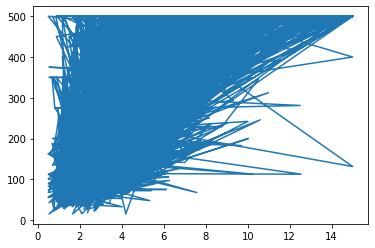

In [ ]:
plt.plot(training_df['median_income'],training_df['median_house_value'])
#plt.plot(training_df[''],training_df['median_house_value'])

Epoch 1/20
340/340 [==============================] - 1s 1ms/step - loss: 14620.8545 - root_mean_squared_error: 120.9167
Epoch 2/20
340/340 [==============================] - 0s 1ms/step - loss: 13464.5977 - root_mean_squared_error: 116.0371
Epoch 3/20
340/340 [==============================] - 0s 1ms/step - loss: 13459.0430 - root_mean_squared_error: 116.0131
Epoch 4/20
340/340 [==============================] - 0s 1ms/step - loss: 13452.8477 - root_mean_squared_error: 115.9864
Epoch 5/20
340/340 [==============================] - 0s 1ms/step - loss: 13457.4648 - root_mean_squared_error: 116.0063
Epoch 6/20
340/340 [==============================] - 0s 1ms/step - loss: 13455.1543 - root_mean_squared_error: 115.9964
Epoch 7/20
340/340 [==============================] - 0s 1ms/step - loss: 13459.5820 - root_mean_squared_error: 116.0154
Epoch 8/20
340/340 [==============================] - 0s 1ms/step - loss: 13447.5820 - root_mean_squared_error: 115.9637
Epoch 9/20
340/340 [============

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


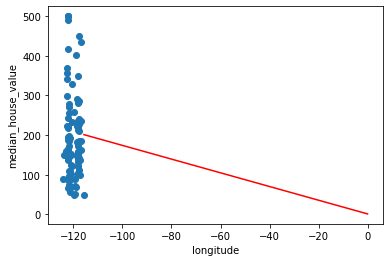

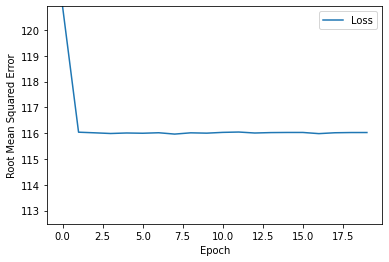

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.03
epochs = 20
batch_size = 50

# Specify the feature and the label.

#########################################################################
#First execute without below line and observe that predication doesn't match actual values 
#as Kms is a large number compared to Present_Price
#training_df['Kms']=training_df['Kms']/1000

#########################################################################

my_feature = "longitude" # the total number of rooms on a specific city block.
#print(my_feature)
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)
print()

In [ ]:
def predict_z_values(n, feature, label):
  """Predict car values based on a feature."""

  batch = training_df[feature][100:100 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature              label                 predicted")
  print("median_income       median_house_value     median_house_value ")
  print("----------------------------------------------------------------")
  for i in range(n):
    print ("%5.2f %25.2f %20.2f" % (training_df[feature][100 + i],
                                   training_df[label][100 + i],
                                   predicted_values[i][0] ))

In [ ]:
predict_z_values(15, my_feature, my_label)

feature              label                 predicted
median_income       median_house_value     median_house_value 
----------------------------------------------------------------
32.79                    159.90               192.48
32.69                     94.40               191.97
33.20                     72.50               194.57
32.87                     83.20               192.89
33.04                     62.00               193.76
33.04                     61.20               193.76
32.80                    125.00               192.53
32.79                     55.20               192.48
32.75                     87.50               192.28
33.36                     50.00               195.39
33.35                     30.00               195.34
33.09                     87.50               194.01
32.80                     93.80               192.53
33.26                     47.50               194.88
33.49                     68.90               196.05
